<a href="https://colab.research.google.com/github/Yashithi98/Machine-Learning/blob/main/Reinforcement_Learning_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reinforcement Learning 

 Model the Maze Solving Problem

*- Python Code*

**Importing Packages**

In [ ]:
import numpy as np
import pylab as plt
import networkx as nx

**Defining Points - Paths of the Maze as coordinates**

In [ ]:
mazePaths = [((0,0),(0,1)),((0,1),(0,2)),((0,1),(1,1)),((0,2),(1,2)),((0,2),(-1,2)),((0,2),(0,3)),((-1,3),(-1,2)),((1,1),(2,1)),((-1,-1),(-1,2)),((0,3),(-1,3)),((-1,-1),(2,-1)),
((1,1),(1,2)),((2,2),(1,2)),((2,1),(2,2)),((2,1),(3,1)),((2,-1),(2,1)),((2,2),(3,2)),((3,2),(3,3))]

**Visualizing the Maze Path**

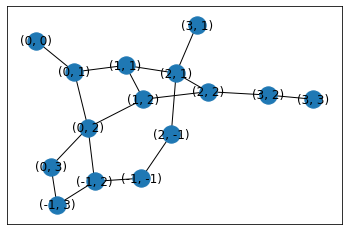

In [ ]:
G=nx.Graph()
G.add_edges_from(mazePaths)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

**Remodelling the Maze Problem**
- Here we remodel the above data by substituting data points for coordinates as demonstrated in the figure below :
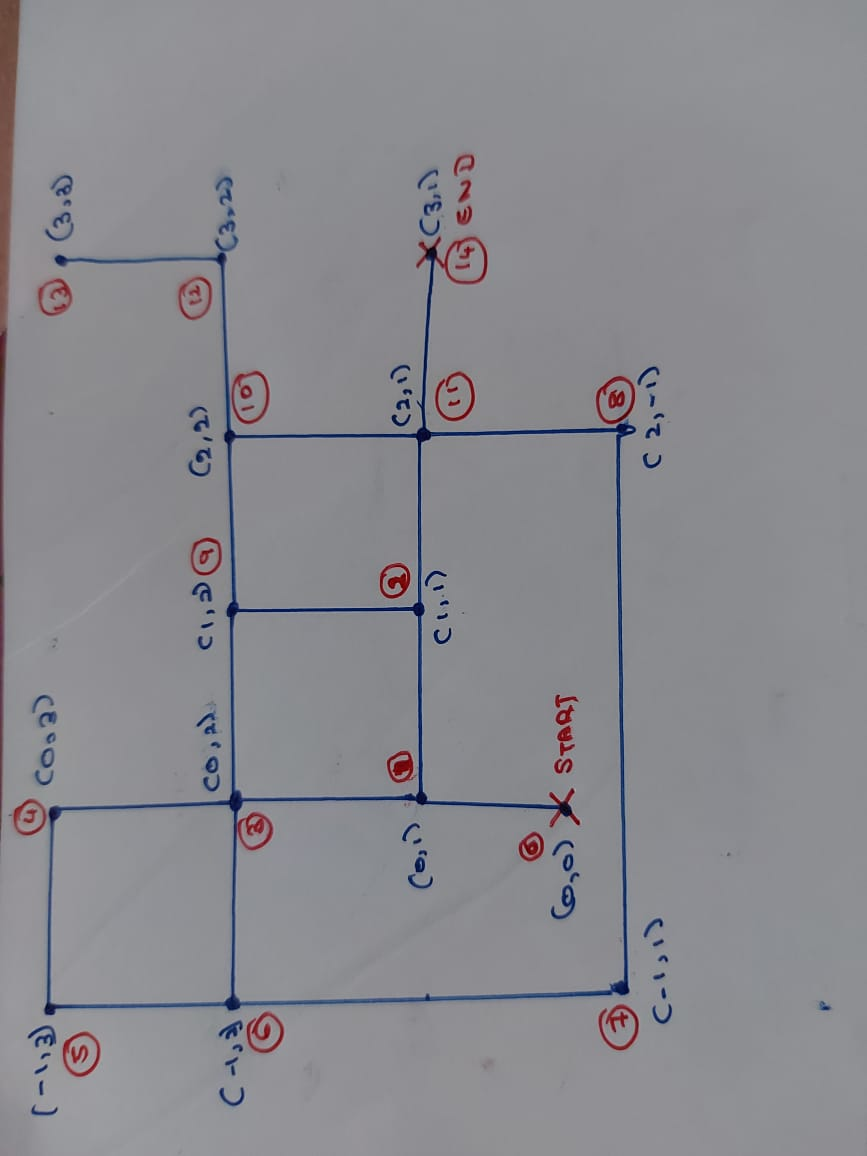
- In order to model this problem to fit the reinforcement learning we create an array which represents the above data points as **states** and the directions as **actions** . 
Eg : [1,UP] = 3, [1,RIGHT] = 2

- Thereby, the states are : {0,1,2,3,4,5,6,7,8,9,10,11,12,13,14}
  Directions are : {0,1,2,3} where UP = 0, DOWN = 1, LEFT = 2, RIGHT = 3

**Defining the data points - nodes**

In [ ]:
pointList = [(0,0),(1,1),(2,2),(1,3),(3,1),(1,0),(7,3),(8,2),(11,1),(8,0),(2,3),(11,2),(9,1),(2,0),(10,1),(11,0),(9,2),(3,3),(10,2),(9,3),(3,2),(6,3),(7,0),(6,1),(5,1),(6,0),(4,1),(3,0),(4,2),(5,3),(10,3),(12,2),(11,3),(14,2),(13,1),(12,0)]

**Intializing Path Array**

In [ ]:
#Initializing a 2D array of -1's as [STATES,DIRECTIONS] 
path = [[-1 for i in range(4)] for j in range(15)]


#Assigning values to this 2D array as [State,Direction] = Resultant State
path[0][0] = 1 
path[1][1] = 0 

path[3][1] = 1
path[1][0] = 3 

path[1][3] = 2
path[2][2] = 1

path[3][2] = 6 
path[6][3] = 3 

path[4][1] = 3
path[3][0] = 4

path[9][2] = 3
path[3][3] = 9

path[9][1] = 2
path[2][0] = 9

path[10][2] = 9
path[9][3] = 10

path[2][3] = 11
path[11][2] = 2

path[10][1] = 11 
path[11][0] = 10

path[10][3] = 12
path[12][2] = 10

path[13][1] = 12
path[12][0] = 13

path[11][1] = 8
path[8][0] = 11

path[7][3] = 8
path[8][2] = 7

path[7][0] = 6
path[6][1] = 7

path[5][1] = 6
path[6][0] = 5

path[4][2] = 5
path[5][3] = 4

path[14][2] = 11
path[11][3] = 14

In [ ]:
path

[[1, -1, -1, -1],
 [3, 0, -1, 2],
 [9, -1, 1, 11],
 [4, 1, 6, 9],
 [-1, 3, 5, -1],
 [-1, 6, -1, 4],
 [5, 7, -1, 3],
 [6, -1, -1, 8],
 [11, -1, 7, -1],
 [-1, 2, 3, 10],
 [-1, 11, 9, 12],
 [10, 8, 2, 14],
 [13, -1, 10, -1],
 [-1, 12, -1, -1],
 [-1, -1, 11, -1]]

**Defining the R Matrix (Rewards Table)**

In [ ]:
destination = 14
R = np.matrix(np.ones(shape=(15, 4)))
R *= -1

for i in pointList:
  x = i[0]
  y = i[1]
  if (path[x][y] == destination):
    R[i] = 100
  else:
    R[i] = 0

In [ ]:
R

matrix([[  0.,  -1.,  -1.,  -1.],
        [  0.,   0.,  -1.,   0.],
        [  0.,  -1.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [ -1.,   0.,   0.,  -1.],
        [ -1.,   0.,  -1.,   0.],
        [  0.,   0.,  -1.,   0.],
        [  0.,  -1.,  -1.,   0.],
        [  0.,  -1.,   0.,  -1.],
        [ -1.,   0.,   0.,   0.],
        [ -1.,   0.,   0.,   0.],
        [  0.,   0.,   0., 100.],
        [  0.,  -1.,   0.,  -1.],
        [ -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.]])

**Q-Learning**

In [ ]:
Q = np.matrix(np.zeros([15,4]))

# Learning Rate
gamma = 0.8

initial_state = 0

def sample_next_action(current_state, direction_value):
    next_action = path[current_state][direction_value]
    return next_action


def update(current_state, action, gamma, direction_value):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    print(max_value)

    Q[current_state, direction_value] = R[current_state, direction_value] + gamma * max_value
    print('max_value', R[current_state, direction_value] + gamma * max_value)

    if (np.max(Q) > 0):
      return(np.sum(Q/np.max(Q)*100))
    else:
      return (0)


**Training**

- The Possible Direction Sequences are as follows :

**1. STARTING FROM (0,0) [STATE : 0]**

Sequence1  = 0 -> 3 -> 3 -> 3 

**2. STARTING FROM (1,1) [STATE : 2]**

Sequence2  = 3 -> 3 

**3. STARTING FROM (1,2) [STATE : 9]**

Sequence3  = 1 -> 3 -> 3 

**4. STARTING FROM (2,-1) [STATE : 8]**

Sequence4  = 0 -> 3



In [ ]:
scores = []

# SEQUENCE 01
seq1 = [0, 3, 3, 3]
current_state = 0
for i in seq1:
    direction_value = i
    action = sample_next_action(current_state, direction_value)
    print(current_state, action, direction_value)
    score = update(current_state, action, gamma, direction_value)
    scores.append(score)
    print ('Score:', str(score))
    current_state = action

# SEQUENCE 02
seq2 = [3, 3]
current_state = 2
for i in seq2:
    direction_value = i
    action = sample_next_action(current_state, direction_value)
    print(current_state, action, direction_value)
    score = update(current_state, action, gamma, direction_value)
    scores.append(score)
    print ('Score:', str(score))
    current_state = action

# SEQUENCE 03
seq3 = [1, 3, 3]
current_state = 9
for i in seq3:
    direction_value = i
    action = sample_next_action(current_state, direction_value)
    print(current_state, action, direction_value)
    score = update(current_state, action, gamma, direction_value)
    scores.append(score)
    print ('Score:', str(score))
    current_state = action

# SEQUENCE 04
seq4 = [0, 3]
current_state = 8
for i in seq4:
    direction_value = i
    action = sample_next_action(current_state, direction_value)
    print(current_state, action, direction_value)
    score = update(current_state, action, gamma, direction_value)
    scores.append(score)
    print ('Score:', str(score))
    current_state = action



0 1 0
0.0
max_value 0.0
Score: 0
1 2 3
0.0
max_value 0.0
Score: 0
2 11 3
0.0
max_value 0.0
Score: 0
11 14 3
0.0
max_value 100.0
Score: 100.0
2 11 3
100.0
max_value 80.0
Score: 180.0
11 14 3
0.0
max_value 100.0
Score: 180.0
9 2 1
80.0
max_value 64.0
Score: 244.0
2 11 3
100.0
max_value 80.0
Score: 244.0
11 14 3
0.0
max_value 100.0
Score: 244.0
8 11 0
100.0
max_value 80.0
Score: 324.0
11 14 3
0.0
max_value 100.0
Score: 324.0


In [ ]:
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

Trained Q matrix:
[[  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.  80.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [ 80.   0.   0.   0.]
 [  0.  64.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0. 100.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]]


**Results**


In [ ]:
initial_state = 0
steps = [initial_state]

while initial_state != 14:
    next_step_index = np.where(Q[initial_state,] == np.max(Q[initial_state,]))[1]

    if next_step_index.shape[0] > 1:
        index = (np.random.choice(next_step_index, size = 1))
        next_step_index = path[initial_state][index[0]]
    else:
        index = int(next_step_index)
        next_step_index = path[initial_state][index]

    steps.append(next_step_index)
    initial_state = next_step_index

print("Most efficient path:")
print(steps)

Most efficient path:
[0, 1, 2, 11, 14]


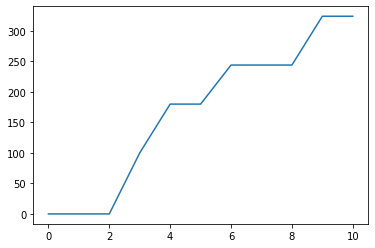

In [ ]:
plt.plot(scores)
plt.show()